# Definição do Problema

**A Chama Olímpica: Desvendando o Esporte de Alto Nível**

A cada 4 anos, o espírito olímpico toma conta do mundo, inspirando atletas, torcedores e nações. Com isso em mente, propõe-se uma análise de dados que busca responder algumas perguntas em relação aos Jogos Olímpicos de Verão, tais como:



*   Qual a relação entre ser o país anfitrião e o número de medalhas conquistadas nas últimas 5 edições?
*   Quais os países têm mais medalhas mesmo tendo uma população pequena e quais são os esportes que eles mais se destacam?
*   Como se dá a distribuição de medalhas do Brasil?
*   Algum país que está em franca evolução nas últimas 4 olimpíadas?
*   Qual o maior detentetor de medalhas de ouro na história entre homens e entre mulheres?
*   Quais os maiores medalhistas de ouro e em geral do Brasil?





**Hipóteses**

Para os problemas em questão, algumas hipóteses são levantadas, dentre elas:



*   O país anfitrião tende a ter um desempenho melhor nos Jogos Olímpicos, pois a organização local pode influenciar a performance dos atletas.
*   Países com populações menores tendem a se especializar em esportes que requerem habilidades específicas, como a ginástica, e podem ter um desempenho mais alto em relação à sua população.
*    Países que têm investido em infraestrutura e treinamento podem mostrar um crescimento significativo em suas medalhas conquistadas.
*   Os maiores atletas da história são de países que possuem o maior número de medalhas na história.





**Restrições e Condições para Seleção de Dados**

A fim de garantir uma qualidade e confiabilidade da análise, algumas restrições e condições foram usadas para seleção dos dados:



*   **Qualidade dos dados**: os dados utilizados são precisos e consistentes.
*   **Diversidade dos datasets**: os datasets incluem informações de diferentes épocas.



**Importação de bibliotecas**

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import min, max, col

# Camada Bronze

Todos os datasets utilizados no projeto foram retirados do Kaggle e salvos no formato de tabela dentro do databricks. Eles representam a camada bronze da arquitetura de dados, ou seja, os dados estão brutos.

https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018

https://www.kaggle.com/datasets/ayushparwal2026/country-population-from-1960-to-2022

In [0]:
# Criar uma sessão do Spark
spark = SparkSession.builder.appName("Olimpiadas").getOrCreate()

# Ler o CSV do DBFS
atletas = spark.read.csv("dbfs:/FileStore/tables/athletes.csv", header=True)
sedes = spark.read.csv("dbfs:/FileStore/tables/olympic_hosts.csv", header=True)
medalhas = spark.read.csv("dbfs:/FileStore/tables/olympic_medals.csv", header=True)
populacao = spark.read.csv("dbfs:/FileStore/tables/population.csv", header=True)

# Converter para Pandas DataFrame, se necessário
dt_atletas = atletas.toPandas()
dt_sedes = sedes.toPandas()
dt_medalhas = medalhas.toPandas()
dt_populacao = populacao.toPandas()

**ATLETAS**

In [0]:
dt_atletas.sample(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals
8676,https://olympics.com/en/athletes/aleksandr-iva...,Aleksandr IVANOV,1,Montreal 1976,1951.0,1
6250,https://olympics.com/en/athletes/kevin-jackson,Kevin JACKSON,1,Barcelona 1992,1964.0,1
15100,https://olympics.com/en/athletes/ronald-ludington,Ronald LUDINGTON,1,Squaw Valley 1960,1934.0,1
5348,https://olympics.com/en/athletes/nils-schumann,Nils SCHUMANN,1,Sydney 2000,1978.0,1
2187,https://olympics.com/en/athletes/marcel-nguyen,Marcel NGUYEN,3,Beijing 2008,1987.0,2
9137,https://olympics.com/en/athletes/craig-howard-...,Craig Howard LINCOLN,1,Munich 1972,1950.0,1
4690,https://olympics.com/en/athletes/alexandra-geo...,Alexandra Georgiana EREMIA,1,Athens 2004,1987.0,2
3329,https://olympics.com/en/athletes/hyeonju-choi,Hyeonju CHOI,1,London 2012,1984.0,1
7891,https://olympics.com/en/athletes/pavel-pavlov-1,Pavel PAVLOV,1,Moscow 1980,1953.0,1
9992,https://olympics.com/en/athletes/mariya-gusakova,Mariya GUSAKOVA,2,Squaw Valley 1960,1931.0,3


In [0]:
dt_atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   athlete_url           15352 non-null  object
 1   athlete_full_name     15352 non-null  object
 2   games_participations  15352 non-null  object
 3   first_game            15352 non-null  object
 4   athlete_year_birth    15087 non-null  object
 5   athlete_medals        15352 non-null  object
dtypes: object(6)
memory usage: 719.8+ KB


**COLUNAS DO DATAFRAME dt_atletas**



*   **athlete_url**: url do atleta no site do comitê olímpico internacional. 
*   **athlete_full_name**: nome completo do atleta. 
*   **games_participations**: número de participações em jogos olímpicos. 
*   **first_game**: primeira edição na qual o atleta participou. 
*   **athlete_year_birth**: ano de nascimento do atleta. 
*   **athlete_medals**: número de medalhas conquistadas pelo atleta. 



**SEDES**

In [0]:
dt_sedes.sample(10)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
12,nagano-1998,1998-02-22T11:00:00Z,1998-02-06T23:00:00Z,Japan,Nagano 1998,Winter,1998
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
29,tokyo-1964,1964-10-24T11:00:00Z,1964-10-09T23:00:00Z,Japan,Tokyo 1964,Summer,1964
41,los-angeles-1932,1932-08-14T19:00:00Z,1932-07-30T16:00:00Z,United States,Los Angeles 1932,Summer,1932
37,london-1948,1948-08-14T19:00:00Z,1948-07-29T07:00:00Z,Great Britain,London 1948,Summer,1948
17,seoul-1988,1988-10-02T10:00:00Z,1988-09-16T22:00:00Z,Republic of Korea,Seoul 1988,Summer,1988
32,squaw-valley-1960,1960-02-28T04:00:00Z,1960-02-18T16:00:00Z,United States,Squaw Valley 1960,Winter,1960
13,atlanta-1996,1996-08-05T21:00:00Z,1996-07-19T12:00:00Z,United States,Atlanta 1996,Summer,1996
15,barcelona-1992,1992-08-09T18:00:00Z,1992-07-25T06:00:00Z,Spain,Barcelona 1992,Summer,1992
28,grenoble-1968,1968-02-18T19:00:00Z,1968-02-06T07:00:00Z,France,Grenoble 1968,Winter,1968


In [0]:
dt_sedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


**COLUNAS DO DATAFRAME dt_sedes**

*   **game_slug**: código dos jogos. 
*   **game_end_date**: data da abertura dos jogos. 
*   **game_start_date**: data do encerramento dos jogos. 
*   **game_location**: país em que foi disputado a edição dos jogos. 
*   **game_name**: nome dos jogos.
*   **game_season**: tipo dos jogos (de verão ou de inverno)
*   **game_year**: ano em que foi disputado.



**MEDALHAS**

In [0]:
dt_medalhas.sample(10)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
19888,Boxing,antwerp-1920,6124 6668kg welterweight men,Men,BRONZE,Athlete,None,None,Fred Kolberg,United States of America,US,USA
782,Badminton,tokyo-2020,Women's Doubles,Women,BRONZE,GameTeam,KIM Soyeong/KONG Heeyong,https://olympics.com/en/athletes/soyeong-kim,Soyeong KIM,Republic of Korea,KR,KOR
17739,Rowing,london-1948,four-oared shell with coxswain men,Men,GOLD,GameTeam,United States team,None,None,United States of America,US,USA
12207,Boxing,los-angeles-1984,48-51kg flyweight men,Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/ibrahim-bilali,Ibrahim BILALI,Kenya,KE,KEN
2788,Taekwondo,rio-2016,- 49 kg women,Women,SILVER,Athlete,None,https://olympics.com/en/athletes/tijana-bogdan...,Tijana BOGDANOVIC,Serbia,RS,SRB
392,Shooting,tokyo-2020,10m Air Rifle Mixed Team,Mixed,BRONZE,GameTeam,ROC 2,https://olympics.com/en/athletes/yulia-karimova,Yulia KARIMOVA,ROC,ROC,ROC
9028,Athletics,atlanta-1996,shot put men,Men,GOLD,Athlete,None,https://olympics.com/en/athletes/eric-randolph...,Eric Randolph BARNES,United States of America,US,USA
5917,Rowing,athens-2004,eight with coxswain 8 women,Women,BRONZE,GameTeam,Netherlands team,None,None,Netherlands,NL,NED
5797,Nordic Combined,turin-2006,Individual sprint men,Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/georg-hettich,Georg HETTICH,Germany,DE,GER
2201,Weightlifting,rio-2016,62kg featherweight men,Men,GOLD,Athlete,None,https://olympics.com/en/athletes/oscar-figueroa,Oscar FIGUEROA,Colombia,CO,COL


In [0]:
dt_medalhas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20200 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


**COLUNAS DO DATAFRAME**



*   **discipline_title**: esporte que distribuiu a medalha.
*   **slug_game**: código dos jogos.
*   **event_title**: título do evento
*   **event_gender**: gênero do evento.
*   **medal_type**: tipo da medalha (ouro, prata ou bronze).
*   **participant_type**: esporte coletivo ou indidividual.
*   **participant_title**: nome do time que conquistou a medalha.
*   **athlete_url**: url do atleta no site do comitê olímpico internacional.
*   **athlete_full_name**: nome completo do atleta.
*   **country_name**: nome do país.
*   **country_code**: código do país.
*   **country_3_letter_code**: código do país com 3 letras.

**POPULAÇÃO**

In [0]:
dt_populacao.sample(10)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
209,Solomon Islands,133440.0,136780.0,140254.0,143863.0,147609.0,151495.0,155514.0,159667.0,163973.0,...,582365.0,597375.0,612660.0,628102.0,643634.0,659249.0,674993.0,691191.0,707851.0,724273.0
45,Colombia,15687688.0,16182414.0,16691282.0,17210956.0,17739754.0,18275814.0,18811407.0,19343961.0,19872503.0,...,46237930.0,46677947.0,47119728.0,47625955.0,48351671.0,49276961.0,50187406.0,50930662.0,51516562.0,51874024.0
170,North America,198624756.0,202007500.0,205198600.0,208253700.0,211262900.0,214031100.0,216659000.0,219176000.0,221503000.0,...,351207902.0,353888902.0,356507139.0,359245796.0,361731237.0,363967201.0,365995094.0,369582571.0,370321816.0,372280991.0
130,Lebanon,1798092.0,1853295.0,1911959.0,1971511.0,2030440.0,2087445.0,2145646.0,2203202.0,2262291.0,...,5678851.0,6274342.0,6398940.0,6258619.0,6109252.0,5950839.0,5781907.0,5662923.0,5592631.0,5489739.0
134,Latin America & Caribbean,219142626.0,225304612.0,231638540.0,238127927.0,244742056.0,251458185.0,258225265.0,265030167.0,271885703.0,...,608642242.0,615046755.0,621390109.0,627668470.0,633797190.0,639628226.0,645295804.0,650534986.0,654980630.0,659310564.0
5,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0
153,Middle East & North Africa,104958259.0,107670788.0,110538003.0,113518054.0,116624655.0,119831991.0,123155200.0,126678043.0,130258116.0,...,422790409.0,431664579.0,440506473.0,448917409.0,456885486.0,465073490.0,473201775.0,479966649.0,486174763.0,493279469.0
76,Fiji,401841.0,414534.0,427695.0,441385.0,455214.0,469010.0,482358.0,494632.0,505979.0,...,913453.0,915560.0,917200.0,918371.0,919019.0,918996.0,918465.0,920422.0,924610.0,929766.0
157,North Macedonia,1462368.0,1481112.0,1497338.0,1511854.0,1529507.0,1547982.0,1567707.0,1588649.0,1610537.0,...,2064032.0,2067471.0,2070226.0,2072490.0,2074502.0,2076217.0,2076694.0,2072531.0,2065092.0,2057679.0
230,East Asia & Pacific (IDA & IBRD countries),884811163.0,884080493.0,895683380.0,918644019.0,941205716.0,964393486.0,990895866.0,1016638561.0,1043384828.0,...,1993077336.0,2009149689.0,2024511016.0,2039794828.0,2055414680.0,2068898629.0,2080648616.0,2090523535.0,2097669023.0,2103055378.0


**COLUNAS DO DATAFRAME**



*   **Country Name**: nome do país.
*   **anos**: população do país referente ao ano.

# Camada Silver


Aqui, iniciamos a camada de limpeza e transformação dos dados brutos, removendo erros, duplicações e outras inconsistências.

Vamos entender como se dispõem as colunas dos dataframes, de modo a identificar as chaves para o nosso esquema.

In [0]:
# Colunas de cada dataframe
print(f"dt_atletas: {dt_atletas.columns.to_list()}")
print(f"dt_sedes: {dt_sedes.columns.to_list()}")
print(f"dt_medalhas: {dt_medalhas.columns.to_list()}")
print(f"dt_populacao: {dt_populacao.columns.to_list()}")

dt_atletas: ['athlete_url', 'athlete_full_name', 'games_participations', 'first_game', 'athlete_year_birth', 'athlete_medals']
dt_sedes: ['game_slug', 'game_end_date', 'game_start_date', 'game_location', 'game_name', 'game_season', 'game_year']
dt_medalhas: ['discipline_title', 'slug_game', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_name', 'country_code', 'country_3_letter_code']
dt_populacao: ['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2

Primeiramente, iremos remover linhas duplicadas de todos os dataframes envolvidos na análise.

In [0]:
# Remover duplicatas dos DataFrames
dt_atletas = dt_atletas.drop_duplicates()
dt_sedes = dt_sedes.drop_duplicates()
dt_medalhas = dt_medalhas.drop_duplicates()
dt_populacao = dt_populacao.drop_duplicates() 

De forma a facilitar a análise dos dados, iremos excluir as linhas de atletas que não receberam medalhas. 

In [0]:
#Retira atletas sem medalha
dt_atletas = dt_atletas.dropna(subset=['athlete_medals'])

dt_atletas.sample(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals
3792,https://olympics.com/en/athletes/ryoko-tani,Ryoko TANI,5,Barcelona 1992,1975.0,5
1556,https://olympics.com/en/athletes/zofia-klepacka,Zofia KLEPACKA,4,Athens 2004,1986.0,1
13331,https://olympics.com/en/athletes/albertson-van...,Albertson VAN ZO POST,2,St. Louis 1904,1865.0,5
3038,https://olympics.com/en/athletes/alan-khugaev,Alan KHUGAEV,1,London 2012,1989.0,1
14407,https://olympics.com/en/athletes/jose-luis-bal...,Jose Luis BALLESTER TULTESA,3,Barcelona 1992,1968.0,1
1504,https://olympics.com/en/athletes/evgeny-rylov,Evgeny RYLOV,2,Rio 2016,1996.0,4
4224,https://olympics.com/en/athletes/sasha-cohen,Sasha COHEN,2,Salt Lake City 2002,1984.0,1
4537,https://olympics.com/en/athletes/sandra-voelker,Sandra VOELKER,4,Barcelona 1992,1974.0,3
3461,https://olympics.com/en/athletes/roddy-darragon,Roddy DARRAGON,2,Turin 2006,1983.0,1
2344,https://olympics.com/en/athletes/bo-qiu,Bo QIU,2,London 2012,1993.0,1


As colunas 'athlete_url' e 'game_slug'/'slug_game' são possíveis chaves primárias para o nosso banco relacional. Por isso, devemos dropar todas as linhas que possuem valor nulo nos respectivos campos. Além disso, podemos dropar as colunas 'country_code' e 'country_3_letter_code', visto que não são relevantes para a análise das perguntas feitas no início do trabalho.

In [0]:
# Dropando linhas com 'athlete_url' vazios
dt_medalhas = dt_medalhas.dropna(subset=['athlete_url'])

# Dropando linhas com 'game_slug'/'slug_game' vazios
dt_sedes = dt_sedes.dropna(subset=['game_slug'])
dt_medalhas = dt_medalhas.dropna(subset=['slug_game'])

# Deletando as colunas desnecessárias
dt_medalhas = dt_medalhas.drop(columns=['country_code','country_3_letter_code'])

Conforme citado no início do notebook, iremos tratar apenas resultados dos jogos olímpicos de verão. Portanto, as sedes de 'inverno' serão prontamente descartadas, bem como, as datas de início e fim de cada evento.

In [0]:
# Removendo linhas com 'Winter' em 'game_season' 
dt_sedes = dt_sedes.drop(dt_sedes[dt_sedes['game_season'] == 'Winter'].index)

# Removendo as colunas 'game_season', 'game_end_date', 'game_start_date'
dt_sedes = dt_sedes.drop(columns=['game_season', 'game_end_date', 'game_start_date'])
dt_sedes

,game_slug,game_location,game_name,game_year
1,tokyo-2020,Japan,Tokyo 2020,2020
3,rio-2016,Brazil,Rio 2016,2016
5,london-2012,Great Britain,London 2012,2012
7,beijing-2008,China,Beijing 2008,2008
9,athens-2004,Greece,Athens 2004,2004
11,sydney-2000,Australia,Sydney 2000,2000
13,atlanta-1996,United States,Atlanta 1996,1996
15,barcelona-1992,Spain,Barcelona 1992,1992
17,seoul-1988,Republic of Korea,Seoul 1988,1988
19,los-angeles-1984,United States,Los Angeles 1984,1984


A fim de padronizar as colunas, renomeamos as colunas 'game_slug' para 'slug_game' e 'game_location' para 'country_name' em dt_sedes e 'Country Name' para 'country_name' em dt_populacao.

In [0]:
# Renomeando a coluna 'game_slug' para 'slug_game'
dt_sedes = dt_sedes.rename(columns={'game_slug': 'slug_game'})
dt_sedes = dt_sedes.rename(columns={'game_location': 'country_name'})

# Renomeando a coluna 'Country Name' para 'country_name'
dt_populacao = dt_populacao.rename(columns={'Country Name': 'country_name'})

Já que trataremos apenas os jogos olímpicos de verão, temos que fazer um breve processo de identificação e exclusão das linhas que se referem aos jogos de inverno em 'dt_sedes' e 'dt_medalhas'.

In [0]:
# Estudando quais foram as edições dos jogos
valores_sedes = dt_sedes['slug_game'].unique()
valores_medalhas = dt_medalhas['slug_game'].unique()

print(f"Valores em dt_sedes: {valores_sedes}")
print("\n")
print(f"Valores em dt_medalhas: {valores_medalhas}")

Valores em dt_sedes: ['tokyo-2020' 'rio-2016' 'london-2012' 'beijing-2008' 'athens-2004'
 'sydney-2000' 'atlanta-1996' 'barcelona-1992' 'seoul-1988'
 'los-angeles-1984' 'moscow-1980' 'montreal-1976' 'munich-1972'
 'mexico-city-1968' 'tokyo-1964' 'rome-1960' 'melbourne-1956'
 'helsinki-1952' 'london-1948' 'berlin-1936' 'los-angeles-1932'
 'amsterdam-1928' 'paris-1924' 'antwerp-1920' 'stockholm-1912'
 'london-1908' 'st-louis-1904' 'paris-1900' 'athens-1896']


Valores em dt_medalhas: ['beijing-2022' 'tokyo-2020' 'pyeongchang-2018' 'rio-2016' 'sochi-2014'
 'london-2012' 'vancouver-2010' 'beijing-2008' 'turin-2006' 'athens-2004'
 'salt-lake-city-2002' 'sydney-2000' 'nagano-1998' 'atlanta-1996'
 'lillehammer-1994' 'barcelona-1992' 'albertville-1992' 'seoul-1988'
 'calgary-1988' 'los-angeles-1984' 'sarajevo-1984' 'moscow-1980'
 'lake-placid-1980' 'montreal-1976' 'innsbruck-1976' 'munich-1972'
 'sapporo-1972' 'mexico-city-1968' 'grenoble-1968' 'tokyo-1964'
 'innsbruck-1964' 'rome-1960' 'squaw

Primeiramente, filtramos o dataframe de atletas com base no array com o nome das sedes presentes em 'dt_sedes'.

In [0]:
# Converter 'game_name' em dt_sedes para minúsculas e obter valores únicos
game_names = dt_sedes['game_name'].str.lower().unique()

# Filtrar dt_atletas com base em 'first_game' presente em game_names
dt_atletas = dt_atletas[dt_atletas['first_game'].str.lower().isin(game_names)]
dt_atletas.sample(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals
7601,https://olympics.com/en/athletes/in-tak-you,In-Tak YOU,1,Los Angeles 1984,1958.0,1
14319,https://olympics.com/en/athletes/michal-stanis...,Michal STANISZEWSKI,3,Barcelona 1992,1973.0,1
2808,https://olympics.com/en/athletes/david-davies-1,David DAVIES,3,Athens 2004,1985.0,2
13998,https://olympics.com/en/athletes/kseniya-sydor...,Kseniya SYDORENKO,4,Beijing 2008,1986.0,1
3939,https://olympics.com/en/athletes/fernando-gonz...,Fernando GONZALEZ,2,Athens 2004,1980.0,3
9077,https://olympics.com/en/athletes/anatoli-novikov,Anatoli NOVIKOV,1,Munich 1972,1947.0,1
5064,https://olympics.com/en/athletes/cuihua-jiang,Cuihua JIANG,1,Sydney 2000,1975.0,1
4270,https://olympics.com/en/athletes/ivo-yanakiev,Ivo YANAKIEV,3,Sydney 2000,1975.0,1
13956,https://olympics.com/en/athletes/andrea-hlavac...,Andrea HLAVACKOVA,2,London 2012,1986.0,1
3659,https://olympics.com/en/athletes/taras-danko,Taras DANKO,2,Athens 2004,1980.0,1


Em seguida, utilizamos de ideia semelhante para filtrar as medalhas com base em 'slug_game' presente nos dataframes 'dt_medalhas' e 'dt_sedes'.

In [0]:
# Filtrar dt_medalhas com base em 'slug_game' presente em dt_sedes['slug_game'].unique()
dt_medalhas = dt_medalhas[dt_medalhas['slug_game'].str.lower().isin(dt_sedes['slug_game'].unique())]
dt_medalhas.sample(10)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name
16352,Wrestling,rome-1960,"Bantamweight, Freestyle (≤57 kilograms) Men",Men,SILVER,Athlete,None,https://olympics.com/en/athletes/nedjet-zalev,Nedjet ZALEV,Bulgaria
14798,Shooting,mexico-city-1968,25m rapid fire pistol 60 shots men,Open,BRONZE,Athlete,None,https://olympics.com/en/athletes/renart-suleim...,Renart SULEIMANOV,Soviet Union
14936,Swimming,mexico-city-1968,100m breaststroke women,Women,BRONZE,Athlete,None,https://olympics.com/en/athletes/sharon-lynn-w...,Sharon Lynn WICHMAN,United States of America
13678,Rowing,montreal-1976,pair without coxswain 2 men,Men,BRONZE,GameTeam,West Germany team,https://olympics.com/en/athletes/thomas-strauss,Thomas STRAUSS,Federal Republic of Germany
15155,Athletics,mexico-city-1968,800m men,Men,GOLD,Athlete,None,https://olympics.com/en/athletes/ralph-doubell,Ralph DOUBELL,Australia
2226,Weightlifting,rio-2016,48kg women,Women,SILVER,Athlete,None,https://olympics.com/en/athletes/sri-wahyuni-a...,Sri Wahyuni AGUSTIANI,Indonesia
6387,Weightlifting,athens-2004,85kg men,Men,GOLD,Athlete,None,https://olympics.com/en/athletes/george-asanidze,George ASANIDZE,Georgia
5609,Gymnastics Artistic,beijing-2008,individual all-round women,Women,GOLD,Athlete,None,https://olympics.com/en/athletes/anastasia-liukin,Anastasia LIUKIN,United States of America
6184,Wrestling,athens-2004,"Welterweight, Freestyle (≤66 kilograms) Men",Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/makhach-murta...,Makhach MURTAZALIEV,Russian Federation
18438,Modern Pentathlon,berlin-1936,Individual competition men,Men,SILVER,Athlete,None,https://olympics.com/en/athletes/charles-fredr...,Charles Fredrick LEONARD,United States of America


Temos também que filtrar as colunas de 'dt_populacao', de modo que apenas os anos referentes aos anos olímpicos permaneçam no dataframe.

In [0]:
#Extrair os valores únicos da coluna 'game_year' e armazená-los em um set
anos_jogos = set(dt_sedes['game_year'].astype(int))

#Filtrar as colunas de 'dt_populacao'
colunas_mantidas = [col for col in dt_populacao.columns if col == 'country_name' or (col.isdigit() and int(col) in anos_jogos)]

#Atualizar o DataFrame com as colunas filtradas
dt_populacao = dt_populacao[colunas_mantidas]

**Visualização dos dataframes após série de modificações**

De modo a facilitar as próximas análises, iremos declarar qual o tipo correto de cada coluna.

In [0]:
dt_atletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12816 entries, 258 to 15349
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   athlete_url           12816 non-null  object
 1   athlete_full_name     12816 non-null  object
 2   games_participations  12816 non-null  object
 3   first_game            12816 non-null  object
 4   athlete_year_birth    12565 non-null  object
 5   athlete_medals        12816 non-null  object
dtypes: object(6)
memory usage: 700.9+ KB


In [0]:
dt_atletas['games_participations'] = dt_atletas['games_participations'].astype(int)
dt_atletas['athlete_year_birth'] = dt_atletas['athlete_year_birth'].astype(float)
dt_atletas['athlete_medals'] = dt_atletas['athlete_medals'].astype(int)

dt_atletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12816 entries, 258 to 15349
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           12816 non-null  object 
 1   athlete_full_name     12816 non-null  object 
 2   games_participations  12816 non-null  int64  
 3   first_game            12816 non-null  object 
 4   athlete_year_birth    12565 non-null  float64
 5   athlete_medals        12816 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 700.9+ KB


In [0]:
dt_medalhas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13935 entries, 355 to 21696
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   discipline_title   13935 non-null  object
 1   slug_game          13935 non-null  object
 2   event_title        13935 non-null  object
 3   event_gender       13935 non-null  object
 4   medal_type         13935 non-null  object
 5   participant_type   13935 non-null  object
 6   participant_title  2263 non-null   object
 7   athlete_url        13935 non-null  object
 8   athlete_full_name  13935 non-null  object
 9   country_name       13935 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [0]:
dt_sedes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 52
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   slug_game     29 non-null     object
 1   country_name  29 non-null     object
 2   game_name     29 non-null     object
 3   game_year     29 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [0]:
dt_sedes['game_year'] = dt_sedes['game_year'].astype(int)

dt_sedes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 52
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   slug_game     29 non-null     object
 1   country_name  29 non-null     object
 2   game_name     29 non-null     object
 3   game_year     29 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [0]:
dt_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  266 non-null    object
 1   1960          266 non-null    object
 2   1964          266 non-null    object
 3   1968          266 non-null    object
 4   1972          266 non-null    object
 5   1976          266 non-null    object
 6   1980          266 non-null    object
 7   1984          266 non-null    object
 8   1988          266 non-null    object
 9   1992          266 non-null    object
 10  1996          266 non-null    object
 11  2000          266 non-null    object
 12  2004          266 non-null    object
 13  2008          266 non-null    object
 14  2012          266 non-null    object
 15  2016          266 non-null    object
 16  2020          266 non-null    object
dtypes: object(17)
memory usage: 37.4+ KB


In [0]:
dt_populacao['1960'] = dt_populacao['1960'].astype(float)
dt_populacao['1964'] = dt_populacao['1964'].astype(float)
dt_populacao['1968'] = dt_populacao['1968'].astype(float)
dt_populacao['1972'] = dt_populacao['1972'].astype(float)
dt_populacao['1976'] = dt_populacao['1976'].astype(float)
dt_populacao['1980'] = dt_populacao['1980'].astype(float)
dt_populacao['1984'] = dt_populacao['1984'].astype(float)
dt_populacao['1988'] = dt_populacao['1988'].astype(float)
dt_populacao['1992'] = dt_populacao['1992'].astype(float)
dt_populacao['1996'] = dt_populacao['1996'].astype(float)
dt_populacao['2000'] = dt_populacao['2000'].astype(float)
dt_populacao['2004'] = dt_populacao['2004'].astype(float)
dt_populacao['2008'] = dt_populacao['2008'].astype(float)
dt_populacao['2012'] = dt_populacao['2012'].astype(float)
dt_populacao['2016'] = dt_populacao['2016'].astype(float)
dt_populacao['2020'] = dt_populacao['2020'].astype(float)

# Renomeando todas as colunas do DataFrame com prefixo 'ano_' a fim de facilitar na hora das consultas
novos_nomes = {col: f"ano_{col}" for col in dt_populacao.columns}
dt_populacao = dt_populacao.rename(columns=novos_nomes)
dt_populacao = dt_populacao.rename(columns={'ano_country_name': 'country_name'})

dt_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   ano_1960      266 non-null    float64
 2   ano_1964      266 non-null    float64
 3   ano_1968      266 non-null    float64
 4   ano_1972      266 non-null    float64
 5   ano_1976      266 non-null    float64
 6   ano_1980      266 non-null    float64
 7   ano_1984      266 non-null    float64
 8   ano_1988      266 non-null    float64
 9   ano_1992      266 non-null    float64
 10  ano_1996      266 non-null    float64
 11  ano_2000      266 non-null    float64
 12  ano_2004      266 non-null    float64
 13  ano_2008      266 non-null    float64
 14  ano_2012      266 non-null    float64
 15  ano_2016      266 non-null    float64
 16  ano_2020      266 non-null    float64
dtypes: float64(16), object(1)
memory usage: 37.4+ KB


In [0]:
print(f"dt_atletas: {dt_atletas.columns.to_list()}")
print(f"dt_sedes: {dt_sedes.columns.to_list()}")
print(f"dt_medalhas: {dt_medalhas.columns.to_list()}")
print(f"dt_populacao: {dt_populacao.columns.to_list()}")

dt_atletas: ['athlete_url', 'athlete_full_name', 'games_participations', 'first_game', 'athlete_year_birth', 'athlete_medals']
dt_sedes: ['slug_game', 'country_name', 'game_name', 'game_year']
dt_medalhas: ['discipline_title', 'slug_game', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_name']
dt_populacao: ['country_name', 'ano_1960', 'ano_1964', 'ano_1968', 'ano_1972', 'ano_1976', 'ano_1980', 'ano_1984', 'ano_1988', 'ano_1992', 'ano_1996', 'ano_2000', 'ano_2004', 'ano_2008', 'ano_2012', 'ano_2016', 'ano_2020']


**Modelagem**

Após analisar os dataframes acima, propõe-se um modelo de dados em Esquema Estrela, permitindo análises e consultas complexas. O esquema citado prevê um **Tabela de Fatos (Fact Table)**, que nesse caso, será 'dt_medalhas', pois ela contém informações mais detalhadas sobre as medalhas conquistadas pelos atletas e, além disso, algumas **Tabelas de Dimensão (Dimension Tables)**, que serão: 'dt_atletas', 'dt_sedes' e 'dt_populacao'.

A fim de definir um chave primária para a tabela de fatos, devemos criar uma coluna 'medal_id' a ser formada por inteiros.

In [0]:
dt_medalhas.insert(0, 'medal_id', range(1, 1+len(dt_medalhas)))
dt_medalhas.sample(10)

,medal_id,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name
19344,12469,Wrestling,amsterdam-1928,"Bantamweight, Freestyle (≤56 kilograms) Men",Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/james-trifunov,James TRIFUNOV,Canada
2153,1226,Athletics,rio-2016,200m women,Women,GOLD,Athlete,None,https://olympics.com/en/athletes/elaine-thompson,Elaine THOMPSON-HERAH,Jamaica
15386,9844,Sailing,tokyo-1964,flying dutchman mixed,Open,SILVER,GameTeam,Lady C,https://olympics.com/en/athletes/franklyn-keit...,Franklyn Keith MUSTO,Great Britain
1537,1001,Beach Volleyball,tokyo-2020,Men,Men,GOLD,GameTeam,Mol A./Sorum C.,https://olympics.com/en/athletes/anders-bernts...,Anders Berntsen MOL,Norway
4278,2746,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/terrence-jenn...,Terrence JENNINGS,United States of America
1428,925,Rowing,tokyo-2020,Lightweight Women's Double Sculls,Women,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/federica-cesa...,Federica CESARINI,Italy
15761,10129,Athletics,tokyo-1964,800m women,Women,BRONZE,Athlete,None,https://olympics.com/en/athletes/ann-marise-ch...,Ann Marise CHAMBERLAIN,New Zealand
11267,7216,Shooting,seoul-1988,10m air rifle 60 shots men,Men,GOLD,Athlete,None,https://olympics.com/en/athletes/goran-maksimovic,Goran MAKSIMOVIC,Yugoslavia
4778,2910,Boxing,beijing-2008,51-54kg bantamweight men,Men,BRONZE,Athlete,None,https://olympics.com/en/athletes/bruno-julie,Bruno JULIE,Mauritius
14813,9503,Shooting,mexico-city-1968,300m free rifle 3 positions 3 men,Open,BRONZE,Athlete,None,https://olympics.com/en/athletes/kurt-muller-1,Kurt MÜLLER,Switzerland


# Camada Gold

A partir deste momento, os dados já estão altamente refinados, prontos para análise e relatórios.

Com o auxílio da ferramenta dbdiagram.io (https://dbdiagram.io/home), montamos o esquema, explicitando as relações entre as tabelas, suas chaves primárias e estrangeiras, bem como o tipo presente em cada um dos campos (texto, inteiro, varchar).

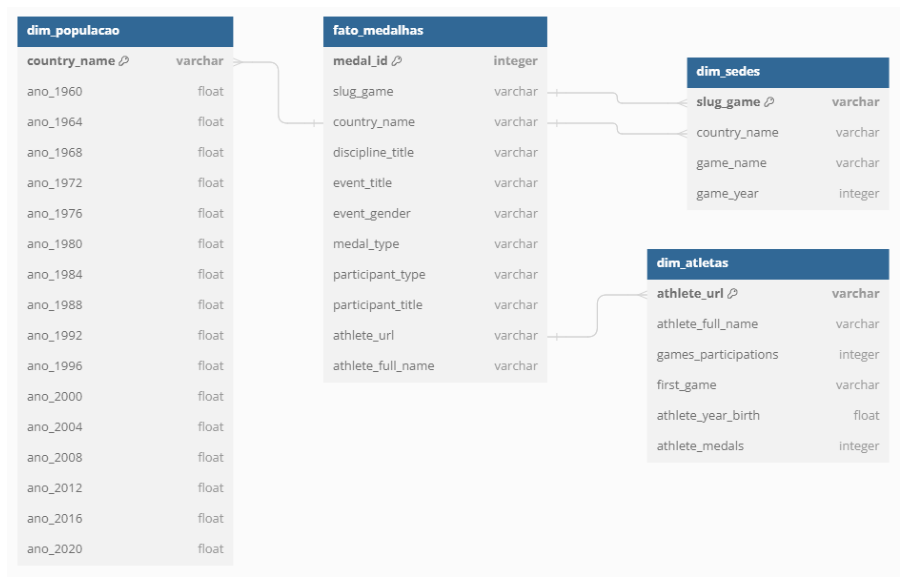

In [0]:
# Definição da URL da imagem corrigida
url = "https://github.com/bernardosnap/MVP---Sprint-Engenharia-de-Dados/blob/main/mvp_olimpiadas.png?raw=true"

# Abre a URL, lê o conteúdo da imagem e converte para um array numpy
response = urllib.request.urlopen(url)
img_array = np.array(Image.open(response))

# Define o tamanho da figura
plt.figure(figsize=(16, 14))

# Exibe a imagem usando matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.show()


**RESUMO DAS CHAVES**

**Tabela _fato_medalhas_:**

Chave Primária (PK):
*     medal_id

Chaves Estrangeiras (FK):
*     slug_game referencia dim_sedes.slug_game
*     country_name referencia dim_sedes.country_name
*     athlete_url referencia dim_atletas.athlete_url
*     country_name referencia dim_populacao.country_name

**Tabela _dim_atletas_:**

Chave Primária (PK):
*     athlete_url

**Tabela _dim_sedes_:**

Chave Primária (PK):
*     slug_game

**Tabela _dim_populacao_:**

Chave Primária (PK):
*     country_name



In [0]:
fato_medalhas = spark.createDataFrame(dt_medalhas)
dim_atletas = spark.createDataFrame(dt_atletas)
dim_sedes = spark.createDataFrame(dt_sedes)
dim_populacao = spark.createDataFrame(dt_populacao)

Por fim, faremos uma outra descrição dos dados, explicitando os valores mínimos e máximos esperados para dados numéricos, e possíveis categorias para dados categóricos.

**ATLETAS**

In [0]:
dim_atletas.agg(
    min("games_participations").alias("min_games_participations"),  # mínimo de participações em jogos
    max("games_participations").alias("max_games_participations"),  # máximo de participações em jogos
    min("athlete_year_birth").alias("min_athlete_year_birth"),      # mínimo de ano de nascimento      
    max("athlete_year_birth").alias("max_athlete_year_birth"),      # máximo de ano de nascimento
    min("athlete_medals").alias("min_athlete_medals"),              # mínimo de medalhas do atleta
    max("athlete_medals").alias("max_athlete_medals"),              # máximo de medalhas do atleta
).show()

+------------------------+------------------------+----------------------+----------------------+------------------+------------------+
|min_games_participations|max_games_participations|min_athlete_year_birth|max_athlete_year_birth|min_athlete_medals|max_athlete_medals|
+------------------------+------------------------+----------------------+----------------------+------------------+------------------+
|                       1|                      10|                1836.0|                2008.0|                 1|                18|
+------------------------+------------------------+----------------------+----------------------+------------------+------------------+



**SEDES**

In [0]:
dim_sedes.agg(
    min("game_year").alias("min_game_year"),    # primeiro jogos
    max("game_year").alias("max_game_year"),    # último jogos
).show()

+-------------+-------------+
|min_game_year|max_game_year|
+-------------+-------------+
|         1896|         2020|
+-------------+-------------+



**MEDALHAS**

In [0]:
fato_medalhas.select("event_gender").distinct().show()      # tipos de gênero na competição
fato_medalhas.select("medal_type").distinct().show()        # tipos de medalhas
fato_medalhas.select("participant_type").distinct().show()  # tipos de esporte

+------------+
|event_gender|
+------------+
|        Open|
|       Mixed|
|         Men|
|       Women|
+------------+

+----------+
|medal_type|
+----------+
|    SILVER|
|      GOLD|
|    BRONZE|
+----------+

+----------------+
|participant_type|
+----------------+
|         Athlete|
|        GameTeam|
+----------------+



**POPULAÇÃO**

In [0]:
dim_populacao.agg(
    min("ano_1960").alias("min_ano_1960"),  # mínimo de população em 1960
    max("ano_1960").alias("max_ano_1960"),  # máximo de população em 1960
    min("ano_1964").alias("min_ano_1964"),  # mínimo de população em 1964
    max("ano_1964").alias("max_ano_1964"),  # máximo de população em 1964
    min("ano_1968").alias("min_ano_1968"),  # mínimo de população em 1968
    max("ano_1968").alias("max_ano_1968"),  # máximo de população em 1968
    min("ano_1972").alias("min_ano_1972"),  # mínimo de população em 1972
    max("ano_1972").alias("max_ano_1972"),  # máximo de população em 1972
).show()

dim_populacao.agg(
    min("ano_1976").alias("min_ano_1976"),  # mínimo de população em 1976
    max("ano_1976").alias("max_ano_1976"),  # máximo de população em 1976
    min("ano_1980").alias("min_ano_1980"),  # mínimo de população em 1980
    max("ano_1980").alias("max_ano_1980"),  # máximo de população em 1980
    min("ano_1984").alias("min_ano_1984"),  # mínimo de população em 1984
    max("ano_1984").alias("max_ano_1984"),  # máximo de população em 1984
    min("ano_1988").alias("min_ano_1988"),  # mínimo de população em 1988
    max("ano_1988").alias("max_ano_1988"),  # máximo de população em 1988
).show()


dim_populacao.agg(
    min("ano_1992").alias("min_ano_1992"),  # mínimo de população em 1992
    max("ano_1992").alias("max_ano_1992"),  # máximo de população em 1992
    min("ano_1996").alias("min_ano_1996"),  # mínimo de população em 1996
    max("ano_1996").alias("max_ano_1996"),  # máximo de população em 1996
    min("ano_2000").alias("min_ano_2000"),  # mínimo de população em 2000
    max("ano_2000").alias("max_ano_2000"),  # máximo de população em 2000
    min("ano_2004").alias("min_ano_2004"),  # mínimo de população em 2004
    max("ano_2004").alias("max_ano_2004"),  # máximo de população em 2004
).show()


dim_populacao.agg(
    min("ano_2008").alias("min_ano_2008"),  # mínimo de população em 2008
    max("ano_2008").alias("max_ano_2008"),  # máximo de população em 2008
    min("ano_2012").alias("min_ano_2012"),  # mínimo de população em 2012
    max("ano_2012").alias("max_ano_2012"),  # máximo de população em 2012
    min("ano_2016").alias("min_ano_2016"),  # mínimo de população em 2016
    max("ano_2016").alias("max_ano_2016"),  # máximo de população em 2016
    min("ano_2020").alias("min_ano_2020"),  # mínimo de população em 2020
    max("ano_2020").alias("max_ano_2020"),  # máximo de população em 2020
).show()



+------------+-------------+------------+-------------+------------+-------------+------------+-------------+
|min_ano_1960| max_ano_1960|min_ano_1964| max_ano_1964|min_ano_1968| max_ano_1968|min_ano_1972| max_ano_1972|
+------------+-------------+------------+-------------+------------+-------------+------------+-------------+
|      2646.0|3.031474234E9|      3811.0|3.260441925E9|      5354.0|3.540164023E9|      5891.0|3.843607574E9|
+------------+-------------+------------+-------------+------------+-------------+------------+-------------+

+------------+-------------+------------+-------------+------------+-------------+------------+-------------+
|min_ano_1976| max_ano_1976|min_ano_1980| max_ano_1980|min_ano_1984| max_ano_1984|min_ano_1988| max_ano_1988|
+------------+-------------+------------+-------------+------------+-------------+------------+-------------+
|      6668.0|4.143091942E9|      7598.0|4.442348279E9|      8125.0|4.766640881E9|      8844.0|5.113387878E9|
+--------

# Consultas

Primeiramente, para executar as consultas, registraremos os dataframes como tabelas temporárias.

In [0]:
# Registrar o DataFrame como uma tabela temporária
fato_medalhas.createOrReplaceTempView("fato_medalhas")
dim_atletas.createOrReplaceTempView("dim_atletas")
dim_sedes.createOrReplaceTempView("dim_sedes")
dim_populacao.createOrReplaceTempView("dim_populacao")

**1) Qual a relação entre ser o país anfitrião e o número de medalhas conquistadas nas últimas 5 edições?**

Para responder isso devemos analisar as tabelas 'fato_medalhas' e 'dim_sedes'.

In [0]:
get_sedes = spark.sql("SELECT slug_game, country_name FROM dim_sedes WHERE game_year > 2000")
get_sedes.show()


+------------+-------------+
|   slug_game| country_name|
+------------+-------------+
|  tokyo-2020|        Japan|
|    rio-2016|       Brazil|
| london-2012|Great Britain|
|beijing-2008|        China|
| athens-2004|       Greece|
+------------+-------------+



In [0]:
consulta_dim_sedes = """
SELECT medal_type, athlete_full_name, slug_game, country_name
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name IN ('Greece', 'China', 'Great Britain', 'Brazil', 'Japan')
ORDER BY athlete_full_name;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes)
get_medalhas_sedes.show()

+----------+--------------------+------------+-------------+
|medal_type|   athlete_full_name|   slug_game| country_name|
+----------+--------------------+------------+-------------+
|      GOLD|          Aaron WOLF|  tokyo-2020|        Japan|
|    BRONZE|      Abner TEIXEIRA|  tokyo-2020|       Brazil|
|      GOLD|          Adam PEATY|    rio-2016|Great Britain|
|      GOLD|          Adam PEATY|  tokyo-2020|Great Britain|
|    BRONZE|      Adriana ARAUJO| london-2012|       Brazil|
|    SILVER|       Adriana BEHAR| athens-2004|       Brazil|
|    SILVER|   Agatha BEDNARCZUK|    rio-2016|       Brazil|
|      GOLD|          Ai SHIBATA| athens-2004|        Japan|
|      GOLD|     Aimilia TSOULFA| athens-2004|       Greece|
|      GOLD|          Akira SONE|  tokyo-2020|        Japan|
|    BRONZE|       Akiyo NOGUCHI|  tokyo-2020|        Japan|
|    BRONZE|       Alan CAMPBELL| london-2012|Great Britain|
|    SILVER|            Alex YEE|  tokyo-2020|Great Britain|
|    BRONZE|   Alexandra

**a) Japão**


In [0]:
consulta_dim_sedes_japao = """
SELECT slug_game, COUNT(*) AS total_medalhas
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name = 'Japan'
GROUP BY slug_game
ORDER BY total_medalhas DESC;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes_japao)
get_medalhas_sedes.show()

+------------+--------------+
|   slug_game|total_medalhas|
+------------+--------------+
|  tokyo-2020|            51|
|    rio-2016|            37|
| athens-2004|            33|
| london-2012|            31|
|beijing-2008|            22|
+------------+--------------+



**b) Brasil**

In [0]:
consulta_dim_sedes_brasil = """
SELECT slug_game, COUNT(*) AS total_medalhas
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name = 'Brazil'
GROUP BY slug_game
ORDER BY total_medalhas DESC;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes_brasil)
get_medalhas_sedes.show()

+------------+--------------+
|   slug_game|total_medalhas|
+------------+--------------+
|    rio-2016|            21|
|  tokyo-2020|            20|
| london-2012|            15|
|beijing-2008|            12|
| athens-2004|             9|
+------------+--------------+



**c) Grã-Bretanha**

In [0]:
consulta_dim_sedes_grabretanha = """
SELECT slug_game, COUNT(*) AS total_medalhas
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name = 'Great Britain'
GROUP BY slug_game
ORDER BY total_medalhas DESC;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes_grabretanha)
get_medalhas_sedes.show()

+------------+--------------+
|   slug_game|total_medalhas|
+------------+--------------+
| london-2012|            66|
|    rio-2016|            62|
|  tokyo-2020|            57|
|beijing-2008|            46|
| athens-2004|            31|
+------------+--------------+



**d) China**

In [0]:
consulta_dim_sedes_china = """
SELECT slug_game, COUNT(*) AS total_medalhas
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name = "People's Republic of China"
GROUP BY slug_game
ORDER BY total_medalhas DESC;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes_china)
get_medalhas_sedes.show()

+------------+--------------+
|   slug_game|total_medalhas|
+------------+--------------+
|beijing-2008|            97|
|  tokyo-2020|            95|
| london-2012|            95|
|    rio-2016|            70|
| athens-2004|            68|
+------------+--------------+



**e) Grécia**

In [0]:
consulta_dim_sedes_grecia = """
SELECT slug_game, COUNT(*) AS total_medalhas
FROM fato_medalhas
WHERE slug_game IN ('athens-2004', 'beijing-2008', 'london-2012', 'rio-2016', 'tokyo-2020')
  AND country_name = 'Greece'
GROUP BY slug_game
ORDER BY total_medalhas DESC;
"""
get_medalhas_sedes = spark.sql(consulta_dim_sedes_grecia)
get_medalhas_sedes.show()

+------------+--------------+
|   slug_game|total_medalhas|
+------------+--------------+
| athens-2004|            17|
|    rio-2016|             7|
|  tokyo-2020|             3|
| london-2012|             3|
|beijing-2008|             2|
+------------+--------------+



É notória a relação entre ser a sede e o número de medalhas, ou seja, sediar os Jogos representa uma oportunidade única para o país anfitrião brilhar no cenário esportivo mundial. 

**2)Quais os três países que mais têm medalhas mesmo tendo uma população pequena e quais são os esportes que eles mais se destacam?**

Para responder tal pergunta, iremos considerar países com uma população pequena como aqueles que possuem menos de 3 milhões de habitantes no ano de 2020. Com isso em mente, consultamos quais são os países na tabela dim_populacao.

In [0]:
consulta_medalhas_paises_pequenos = """
SELECT f.country_name, COUNT(*) AS num_medalhas
FROM fato_medalhas f
JOIN dim_populacao d ON f.country_name = d.country_name
WHERE d.ano_2020 < 3000000
GROUP BY f.country_name
ORDER BY num_medalhas DESC;
"""
get_medalhas_paises_pequenos = spark.sql(consulta_medalhas_paises_pequenos)
get_medalhas_paises_pequenos.show()

+-------------------+------------+
|       country_name|num_medalhas|
+-------------------+------------+
|            Jamaica|          62|
|            Estonia|          33|
|           Slovenia|          31|
|          Lithuania|          26|
|             Latvia|          21|
|            Armenia|          17|
|Trinidad and Tobago|          15|
|              Qatar|           9|
|            Namibia|           5|
|         San Marino|           4|
|            Bahrain|           4|
|             Kosovo|           3|
|            Grenada|           3|
|            Iceland|           3|
|    North Macedonia|           2|
|            Bermuda|           2|
|           Suriname|           2|
|         Luxembourg|           2|
|              Gabon|           1|
|             Cyprus|           1|
+-------------------+------------+
only showing top 20 rows



Após a consulta realizada, verificamos que Jamaica, Estônia e Eslovênia são as maiores potências de "países pequenos". Em seguida, checaremos em quais esportes os mesmos se destacam.

**a)Jamaica**

In [0]:
consulta_medalhas_jamaica = """
SELECT discipline_title, COUNT(*) AS num_medalhas
FROM fato_medalhas 
WHERE country_name == 'Jamaica'
GROUP BY discipline_title
ORDER BY num_medalhas DESC;
"""
get_medalhas_jamaica = spark.sql(consulta_medalhas_jamaica)
get_medalhas_jamaica.show()

+----------------+------------+
|discipline_title|num_medalhas|
+----------------+------------+
|       Athletics|          61|
|   Cycling Track|           1|
+----------------+------------+



Conforme esperado pelo senso comum, a Jamaica, lar de atletas como Usain Bolt e Asafa Powell, é uma verdadeira potência no atletismo internacional e olímpico. 

**b)Estônia**

In [0]:
consulta_medalhas_estonia = """
SELECT discipline_title, COUNT(*) AS num_medalhas
FROM fato_medalhas 
WHERE country_name == 'Estonia'
GROUP BY discipline_title
ORDER BY num_medalhas DESC;
"""
get_medalhas_estonia = spark.sql(consulta_medalhas_estonia)
get_medalhas_estonia.show()

+----------------+------------+
|discipline_title|num_medalhas|
+----------------+------------+
|       Wrestling|          11|
|   Weightlifting|           7|
|       Athletics|           4|
|          Rowing|           3|
|            Judo|           3|
|         Sailing|           2|
|         Fencing|           1|
|   Cycling Track|           1|
|          Boxing|           1|
+----------------+------------+



Já a Estônia tem como principais esportes: a Luta Livre (Wrestling), o Levantamento de Peso (Weightlifting) e o Atletismo.

**c)Eslovênia**

In [0]:
consulta_medalhas_eslovenia = """
SELECT discipline_title, COUNT(*) AS num_medalhas
FROM fato_medalhas 
WHERE country_name == 'Slovenia'
GROUP BY discipline_title
ORDER BY num_medalhas DESC;
"""
get_medalhas_eslovenia = spark.sql(consulta_medalhas_eslovenia)
get_medalhas_eslovenia.show()

+----------------+------------+
|discipline_title|num_medalhas|
+----------------+------------+
|          Rowing|           8|
|            Judo|           6|
|       Athletics|           4|
|    Canoe Slalom|           3|
|         Sailing|           3|
|        Shooting|           3|
|    Cycling Road|           2|
|  Sport Climbing|           1|
|        Swimming|           1|
+----------------+------------+



Por fim, a Eslovênia tem como principais esportes: o Remo, o Judo e o Atletismo.

**3)Como se dá a distribuição de medalhas do Brasil?**

In [0]:
consulta_medalhas_brasil = """
SELECT discipline_title, COUNT(*) AS num_medalhas
FROM fato_medalhas 
WHERE country_name == 'Brazil'
GROUP BY discipline_title
ORDER BY num_medalhas DESC;
"""
get_medalhas_brasil = spark.sql(consulta_medalhas_brasil)
get_medalhas_brasil.show()

+-------------------+------------+
|   discipline_title|num_medalhas|
+-------------------+------------+
|            Sailing|          33|
|               Judo|          24|
|   Beach Volleyball|          15|
|          Athletics|          14|
|           Swimming|          12|
|             Boxing|           8|
|       Canoe Sprint|           5|
|Gymnastics Artistic|           4|
|      Skateboarding|           3|
|           Shooting|           3|
|             Tennis|           2|
|  Marathon Swimming|           2|
|Artistic Gymnastics|           2|
|          Taekwondo|           2|
|            Surfing|           1|
|  Modern Pentathlon|           1|
| Equestrian Jumping|           1|
+-------------------+------------+



Ao longo da historia, o Brasil se destaca na Vela, no Judo, no Volei de Praia, no Atletismo e na Natação.

**4)Algum país que está em franca evolução a partir das olimpíadas de Sydney-2000?**

Para analisar esse caso, devemos buscar o numero total de medalhas de cada páis ao longo das últimas 6 edições. O total de medalhas deve ser menor do que 20 e ordenado a partir de sydney-2000.

In [0]:
consulta_ascensao = """
SELECT
  fm.country_name,
  COUNT(CASE WHEN ds.game_year = 2000 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2000, --conta o número de medalhas de cada país na edição de 2000
  COUNT(CASE WHEN ds.game_year = 2004 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2004, --conta o número de medalhas de cada país na edição de 2004
  COUNT(CASE WHEN ds.game_year = 2008 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2008, --conta o número de medalhas de cada país na edição de 2008
  COUNT(CASE WHEN ds.game_year = 2012 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2012, --conta o número de medalhas de cada país na edição de 2012
  COUNT(CASE WHEN ds.game_year = 2016 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2016, --conta o número de medalhas de cada país na edição de 2016
  COUNT(CASE WHEN ds.game_year = 2020 THEN fm.medal_id ELSE NULL END) AS num_medalhas_2020 --conta o número de medalhas de cada país na edição de 2020
FROM fato_medalhas fm
JOIN dim_sedes ds ON fm.slug_game = ds.slug_game
GROUP BY fm.country_name
HAVING num_medalhas_2000 < 20 --seleciona apenas os países que conquistaram menos de 20 medalhas nos Jogos Olímpicos de 2000
ORDER BY num_medalhas_2000 DESC
LIMIT 17;
"""

get_ascensao = spark.sql(consulta_ascensao)
get_ascensao.show()

+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|     country_name|num_medalhas_2000|num_medalhas_2004|num_medalhas_2008|num_medalhas_2012|num_medalhas_2016|num_medalhas_2020|
+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|Republic of Korea|               19|               24|               25|               21|               17|               16|
|          Hungary|               17|               15|               10|               18|               14|               17|
|            Japan|               16|               33|               22|               31|               37|               51|
|           Poland|               16|               12|                9|               13|               12|               12|
|          Belarus|               14|                6|                6|                5|             

Três países podem ser considerados em evolução, sendo eles: Suíça, Brasil e, principalmente, o Japão.

**5)Qual o maior detentetor de medalhas de ouro na história entre homens e entre mulheres?**

In [0]:
consulta_ranking_atletas = """
SELECT
  da.athlete_full_name,
  fm.event_gender,
  fm.discipline_title,
  COUNT(*) AS num_medalhas_ouro,
  CAST(SUBSTRING(CONCAT(AVG(da.games_participations)), 0, LENGTH(AVG(da.games_participations)) - 2) AS INT) AS numero_participacoes,
  fm.country_name,
  da.first_game
FROM dim_atletas da
JOIN fato_medalhas fm ON da.athlete_url = fm.athlete_url
WHERE fm.medal_type = "GOLD"  --filtro para apenas medalhas de ouro
GROUP BY da.athlete_full_name, fm.event_gender, fm.discipline_title, fm.country_name, da.first_game  
ORDER BY num_medalhas_ouro DESC, numero_participacoes DESC, da.athlete_full_name
LIMIT 10;

"""

get_ranking_atletas = spark.sql(consulta_ranking_atletas)
get_ranking_atletas.show()


+-----------------+------------+-------------------+-----------------+--------------------+--------------------+----------------+
|athlete_full_name|event_gender|   discipline_title|num_medalhas_ouro|numero_participacoes|        country_name|      first_game|
+-----------------+------------+-------------------+-----------------+--------------------+--------------------+----------------+
|   Michael PHELPS|         Men|           Swimming|               13|                   5|United States of ...|     Sydney 2000|
|         Ray EWRY|         Men|          Athletics|                8|                   4|United States of ...|      Paris 1900|
|       Carl LEWIS|         Men|          Athletics|                7|                   4|United States of ...|Los Angeles 1984|
|   Vera CASLAVSKA|       Women|Gymnastics Artistic|                7|                   3|      Czechoslovakia|       Rome 1960|
|       Usain BOLT|         Men|          Athletics|                6|                   4

Entre os homens, Michael Phelps é reconhecido como o atleta olímpico mais condecorado de todos os tempos, dominando as provas de natação por anos. Por outro lado, entre as mulheres, temos o destaque da ginasta Vera Caslavska.


**6)Quais os maiores medalhistas de ouro e em geral do Brasil?**

In [0]:
consulta_ranking_brasileiros_ouro = """
SELECT
  da.athlete_full_name,
  fm.discipline_title,
  COUNT(*) AS num_medalhas_ouro,
  CAST(SUBSTRING(CONCAT(AVG(da.games_participations)), 0, LENGTH(AVG(da.games_participations)) - 2) AS INT) AS numero_participacoes,
  da.first_game
FROM dim_atletas da
JOIN fato_medalhas fm ON da.athlete_url = fm.athlete_url
WHERE fm.medal_type = "GOLD" AND fm.country_name = 'Brazil' --filtro para brasileiros com medalhas de ouro
GROUP BY da.athlete_full_name, fm.discipline_title, da.first_game
ORDER BY num_medalhas_ouro DESC, numero_participacoes DESC, da.athlete_full_name
LIMIT 15;

"""

get_ranking_brasileiros_ouro = spark.sql(consulta_ranking_brasileiros_ouro)
get_ranking_brasileiros_ouro.show()


+--------------------+-------------------+-----------------+--------------------+----------------+
|   athlete_full_name|   discipline_title|num_medalhas_ouro|numero_participacoes|      first_game|
+--------------------+-------------------+-----------------+--------------------+----------------+
|      Robert SCHEIDT|            Sailing|                2|                   7|    Atlanta 1996|
|        Torben GRAEL|            Sailing|                2|                   6|Los Angeles 1984|
|Adhemar FERREIRA ...|          Athletics|                2|                   4|     London 1948|
|    Marcelo FERREIRA|            Sailing|                2|                   4|  Barcelona 1992|
|        Kahena KUNZE|            Sailing|                2|                   2|        Rio 2016|
|       Martine GRAEL|            Sailing|                2|                   2|        Rio 2016|
|      Rodrigo PESSOA| Equestrian Jumping|                1|                   7|  Barcelona 1992|
|     RICA

Robert Scheidt, Torben Grael, Adhemar Ferreira, Marcelo Ferreira, Kahena Kunze e Martine Grael são os maiores nomes do Brasil no quesito medalhas de ouro.

In [0]:
consulta_ranking_brasileiros = """
SELECT
  da.athlete_full_name,
  fm.discipline_title,
  COUNT(*) AS num_medalhas,
  CAST(SUBSTRING(CONCAT(AVG(da.games_participations)), 0, LENGTH(AVG(da.games_participations)) - 2) AS INT) AS numero_participacoes,
  da.first_game
FROM dim_atletas da
JOIN fato_medalhas fm ON da.athlete_url = fm.athlete_url
WHERE fm.country_name = 'Brazil'
GROUP BY da.athlete_full_name, fm.discipline_title, da.first_game
ORDER BY num_medalhas DESC, numero_participacoes DESC, da.athlete_full_name
LIMIT 15;

"""

get_ranking_brasileiros = spark.sql(consulta_ranking_brasileiros)
get_ranking_brasileiros.show()


+--------------------+-------------------+------------+--------------------+----------------+
|   athlete_full_name|   discipline_title|num_medalhas|numero_participacoes|      first_game|
+--------------------+-------------------+------------+--------------------+----------------+
|      Robert SCHEIDT|            Sailing|           5|                   7|    Atlanta 1996|
|        Torben GRAEL|            Sailing|           4|                   6|Los Angeles 1984|
|Isaquias QUEIROZ ...|       Canoe Sprint|           4|                   2|        Rio 2016|
|      Gustavo BORGES|           Swimming|           3|                   4|  Barcelona 1992|
|    Marcelo FERREIRA|            Sailing|           3|                   4|  Barcelona 1992|
|     RICARDO RICARDO|   Beach Volleyball|           3|                   4|     Sydney 2000|
|   Cesar CIELO FILHO|           Swimming|           3|                   2|    Beijing 2008|
|     Reinaldo CONRAD|            Sailing|           2|     

Nesse novo cenário, outros nomes surgem além dos citados anteriormente, entre eles: Isaquias Queiroz, Gustavo Borges, Ricardo e Cesar Cielo.

# Conclusão/Autoavaliação

De modo geral, as perguntas formuladas no início do trabalho foram bem respondidas pelas consultas realizadas na parte final. As análises fornecidas permitiram uma visão clara e informativa sobre a distribuição de medalhas e o desempenho dos atletas ao longo das Olimpíadas. No entanto, os resultados não podem ser considerados 100% satisfatórios, pois houve uma limitação significativa na análise: os esportes coletivos foram desconsiderados. Essa exclusão ocorreu devido ao descarte das linhas da tabela que possuíam 'athlete_url' nulos, um problema comum nos registros de esportes coletivos.

Essa limitação impactou diretamente no número de medalhas de atletas renomados como Michael Phelps. Embora ele tenha conquistado 23 medalhas, nossas consultas revelaram apenas 13, uma vez que suas medalhas obtidas em competições por equipe foram desconsideradas.

Para que os resultados fossem mais satisfatórios e precisos, seria essencial que todas as linhas da coluna 'athlete_url' estivessem preenchidas, garantindo assim uma análise completa e abrangente de todas as modalidades esportivas e dos desempenhos individuais e coletivos dos atletas.

Além disso, para trabalhos futuros, gostaria de integrar mais fontes de dados, como as olimpíadas de inverno e as competições parolímpicas, enriquecendo ainda mais a análise.